In [2]:
import pandas as pd 
df =pd.read_csv("dataset_final_molfin_ic50.csv")

In [3]:
df

,Unnamed: 0,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.756962
1,1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.882397
2,2,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.869666
3,3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.900665
4,4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.950782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,72,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.675718
73,73,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.675718
74,74,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.412289
75,75,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.841638


In [10]:
df =df.drop(columns = "Unnamed: 0")

In [11]:
df

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880,pIC50
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.756962
1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.882397
2,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.869666
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.900665
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.950782
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.675718
73,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.675718
74,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.412289
75,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4.841638


In [12]:
x =df.drop(columns = "pIC50")
x

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,PubchemFP10,PubchemFP11,PubchemFP12,PubchemFP13,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP17,PubchemFP18,PubchemFP19,PubchemFP20,PubchemFP21,PubchemFP22,PubchemFP23,PubchemFP24,PubchemFP25,PubchemFP26,PubchemFP27,PubchemFP28,PubchemFP29,PubchemFP30,PubchemFP31,PubchemFP32,PubchemFP33,PubchemFP34,PubchemFP35,PubchemFP36,PubchemFP37,PubchemFP38,PubchemFP39,...,PubchemFP841,PubchemFP842,PubchemFP843,PubchemFP844,PubchemFP845,PubchemFP846,PubchemFP847,PubchemFP848,PubchemFP849,PubchemFP850,PubchemFP851,PubchemFP852,PubchemFP853,PubchemFP854,PubchemFP855,PubchemFP856,PubchemFP857,PubchemFP858,PubchemFP859,PubchemFP860,PubchemFP861,PubchemFP862,PubchemFP863,PubchemFP864,PubchemFP865,PubchemFP866,PubchemFP867,PubchemFP868,PubchemFP869,PubchemFP870,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,1,1,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
73,1,1,1,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
74,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
75,1,1,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [18]:
y = df.iloc[:,-1]

In [19]:
y

0     4.756962
1     4.882397
2     4.869666
3     4.900665
4     4.950782
        ...   
72    4.675718
73    4.675718
74    4.412289
75    4.841638
76    4.605548
Name: pIC50, Length: 77, dtype: float64

In [24]:
from sklearn.feature_selection import VarianceThreshold
def remove_low_variance(input_data ,threshold=0.1):
    selection =VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices =True)]]
x = remove_low_variance(x, threshold=0.1)
x

,PubchemFP2,PubchemFP12,PubchemFP14,PubchemFP15,PubchemFP16,PubchemFP20,PubchemFP33,PubchemFP34,PubchemFP37,PubchemFP143,PubchemFP145,PubchemFP146,PubchemFP150,PubchemFP153,PubchemFP179,PubchemFP180,PubchemFP181,PubchemFP185,PubchemFP186,PubchemFP192,PubchemFP256,PubchemFP258,PubchemFP259,PubchemFP285,PubchemFP286,PubchemFP293,PubchemFP294,PubchemFP299,PubchemFP301,PubchemFP308,PubchemFP333,PubchemFP335,PubchemFP340,PubchemFP341,PubchemFP342,PubchemFP345,PubchemFP346,PubchemFP349,PubchemFP351,PubchemFP352,...,PubchemFP667,PubchemFP671,PubchemFP672,PubchemFP673,PubchemFP674,PubchemFP676,PubchemFP680,PubchemFP682,PubchemFP683,PubchemFP684,PubchemFP685,PubchemFP686,PubchemFP688,PubchemFP689,PubchemFP692,PubchemFP693,PubchemFP694,PubchemFP695,PubchemFP696,PubchemFP697,PubchemFP698,PubchemFP699,PubchemFP704,PubchemFP706,PubchemFP707,PubchemFP708,PubchemFP709,PubchemFP710,PubchemFP712,PubchemFP716,PubchemFP729,PubchemFP734,PubchemFP758,PubchemFP776,PubchemFP779,PubchemFP792,PubchemFP797,PubchemFP798,PubchemFP818,PubchemFP821
0,1,1,1,1,0,0,1,0,0,1,1,1,1,1,1,1,1,1,0,0,1,0,0,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,...,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1
1,0,1,1,0,0,0,1,0,0,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,0,0,0,0,1,0,1,1,0,1,0,0,1,1,...,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1
2,0,1,1,0,0,1,0,0,0,1,1,1,0,0,1,0,1,1,1,1,0,0,0,1,1,0,0,0,0,0,1,0,1,1,0,1,1,0,1,1,...,0,1,1,1,0,0,1,0,1,1,1,0,1,1,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1
3,0,1,1,1,0,0,1,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,1,0,0,1,0,1,1,1,1,0,0,1,1,...,0,1,1,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,1,0,1,0,0,1,0,0,0,1
4,0,1,1,0,0,0,1,0,1,1,1,1,1,1,1,0,0,1,1,0,1,0,1,1,1,1,1,0,0,0,1,0,1,1,1,1,0,0,1,1,...,0,1,0,1,0,0,0,0,1,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,1,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,1,1,0
73,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,...,0,1,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1,0,1,0
74,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,...,0,1,1,0,0,0,1,0,0,1,0,1,1,1,1,1,1,0,1,1,1,1,1,1,0,1,1,1,1,0,0,1,0,1,0,0,1,1,1,0
75,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,1,1,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,1,...,0,1,0,0,0,0,1,0,0,1,0,1,1,1,1,1,0,0,1,1,1,1,1,0,0,1,1,1,1,0,0,1,0,1,0,0,1,0,1,0


In [25]:
x.to_csv("descriptor_list.csv", index =False)


In [26]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [27]:
model =RandomForestRegressor(n_estimators = 500, random_state =42)
model.fit(x,y)
r2 =model.score(x,y)
r2

0.9544055611306173

In [32]:
y_pred =model.predict(x)
y_pred

array([4.82761308, 5.15267092, 4.74170738, 4.93010468, 5.03417128,
       5.15267092, 5.68064592, 5.15267092, 4.2779016 , 4.34598088,
       4.61922717, 4.61922717, 4.94305523, 4.23956821, 3.75365109,
       3.76769951, 4.30766463, 4.48367506, 5.86580864, 3.70923234,
       3.92941176, 3.30761279, 3.69047455, 4.10605109, 4.2199401 ,
       4.51093306, 4.88569256, 4.82029247, 4.81809515, 3.70800629,
       3.72801272, 3.56884934, 3.6610331 , 3.6501818 , 3.83421176,
       3.68059856, 4.16217355, 4.37293729, 4.21942095, 4.00848763,
       4.82474987, 4.81809515, 4.86748515, 5.13861942, 6.29504334,
       4.8616239 , 4.83096141, 4.7593362 , 4.91164117, 4.81432218,
       4.9307748 , 4.82825884, 4.91038574, 4.50516605, 4.78531911,
       4.83989933, 4.71678988, 4.78584667, 4.71438742, 4.78422554,
       4.59689202, 7.14119331, 6.68048569, 6.73769343, 7.19631042,
       7.05446588, 5.93919376, 7.08539448, 6.94796081, 6.92307401,
       3.99003775, 4.23355481, 4.54469051, 4.61544463, 4.53602

In [33]:
print("mean squared error (MSE): %.2f"%mean_squared_error(y, y_pred))

mean squared error (MSE): 0.05


In [34]:
print("coefficient of determination : %.2f"% r2_score(y,y_pred))

coefficient of determination : 0.95


Text(0.5, 0, 'experimental pIC50')

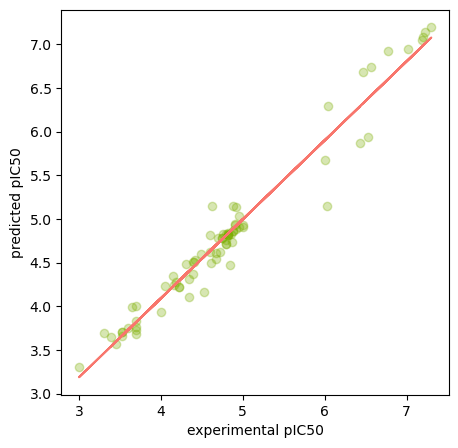

In [37]:
import matplotlib.pyplot as plt 
import numpy as np
plt.figure(figsize =(5,5))
plt.scatter(x=y ,y=y_pred,c="#7CAE00",alpha =0.3)
z = np.polyfit(y,y_pred,1)
p = np.poly1d(z)
plt.plot(y,p(y),"#F8766D")
plt.ylabel("predicted pIC50")
plt.xlabel("experimental pIC50")

In [38]:
import pickle

In [39]:
pickle.dump(model, open("coronavirus_inhibitor.pkl","wb"))